# Desafío final Housing

Inspecionaremos datos inmobiliarios de Argentina.


Vamos a inspeccionar al mercado inmobiliario Argentino (Arg.) limitado a la Ciudad Autónoma de Buenos Aires (CABA). Entendiendo al mercado inmobiliario como multi-factorial dados sus múltiples enfoques.


La necesidad de **acceso a la vivienda** es una necesidad genuina y primaria en la vida de todo habitante. La elección de un “habiente” para desarrollar la vida se ve “sesgado” por múltiples factores.

__Distancias__:
Las distancias pueden caracterizar la zona en la cuál se alojará la potencial vivienda.
* D1 ¿Que distancia al trabajo estamos dispuestos a recorrer?
* D2 ¿Que distancia a los centros educativos?
* D3 ¿Que distancia a los puntos “verdes”? Plazas, parques, etc.
* D4 ¿Que distancia a medios de transporte público? Tren, subte, colectivos.
* D5 ¿Que distancia a los accesos “principales”? Avenidas, autopistas.

A priori estamos tentados en pensar que el _“mejor”_ habiente es el que minimizará las distancias antes mencionadas. Pero es natural preguntarse si este ambiente hipotético cumple con las características que, primero cubran las necesidades habitacionales y luego cuenten con **"comodidades extras"** (amenities). Asumiendo que hay tantas interpretaciones de “comodidades extra” como habitantes. Pero podríamos

_Amenities_:
* A1 ¿?

Dado que nos será facil encontrar datos abiertos de amenities podríamos construir una escala sobre los datos a riesgo de equivocarnos. 

__Amenities relacionales__:
* A1 Baños por m2. Asumimos que habientes más modetos contaran con una relación menor.
* A2 Superficie descubierta por superficie cubierta. Asumimos que habientes con mayor superficie destinada al "ocio" poseen un grado mayor de comodidad.
* A3 Habientes por m2. Asumimos que ambientes con mayor espacio aumentan el confort.


Como **unidad de negocio**, este mercado puede analizarce, aunque [cuestionadamente](https://www.lanacion.com.ar/propiedades/casas-y-departamentos/el-producto-inmobiliario-como-commodity-llega-a-su-fin-nid26042022/), como un [commodity](https://toni-garcia.com/se-ha-convertido-la-vivienda-en-un-commodity/). En el mercado Argentino, con fluctuaciones grandes de la moneda estos mercados, podrían ser tentadores como resguardo de inversiones. Aunque todo esto no habla de la necesidad básica del acceso a la vivienda. Aquí entendemos que el tecnisismo para un análisis es mayor que el que podamos aportar. Solo podremos intentar correlacionar los valores de propiedades con la evolución 
de algunos indicadores.

_Unidad e negocio_:

* UN1 __USD__. Valor del dolar al momento de publicar la propiedad.
* UN2 __CAC__. Indicador del Costo de la Construcción de la Cámara Argentina de la Construcción.
* UN3 __CER__. Coeficiente de estabilización de referencia. El CER es publicado mensualmente por el Banco Central de la República Argentina. Reflejan la variación diaria de la evolución mensual del índice de precios al consumidor publicado por el INDEC.
* UN4 __UVA__. Unidad de Valor Adquisitivo. Indicador para medir la evolución de la inflación tomando como base el Índice de Precios al Consumidor (IPC) del INDEC. Cuando uno toma créditos, este valor cambia de acuerdo a la cotización del día y con ello lo que uno debe.
* UN5 __UVI__. Unidades de Vivienda. Es una unidad que se ajusta en pesos indexada por el índice de costos la Construcción. Si bien también se puede utilizar para ajustar créditos hipotecarios, hoy la banca pública lo ofrece como una forma de ahorro en metros cuadrados de vivienda. En donde se ahorra en UVI y se calcula que cada 1.000 unidades se adquiere un metro de construcción.


Con lo expuesto anteriormente vemos que predecir el costo de una propiedad, sin caer en sobre ajustes, o que nuestro modelo no sea actualizable puede ser un verdadero desafío. También nos encontramos con medidas de resumen que nos cuestionamos si son apropiadas para la cotización de una propiedad (por ejemplo: m² según barrio). 

En este trabajo intentaremos humildemente que los datos hablen por sí.

In [1]:
import os


import numpy as np

import pandas as pd
import geopandas as gpd
import shapely

# Para manipulación de datos geométricos
from shapely.geometry import LineString, Point, LinearRing
# Visualización de faltantes
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams['figure.figsize'] = (10,5)
#%matplotlib inline


import warnings
# Silenciamos los mensajes de actualización de shpaply
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# Caracterización de la Ciudad de Buenos Aires CABA

Utilizaremos los datos abiertos de las calles de la Ciudad de Buenos Aires para tener una referencia espacial.

In [2]:
calles_url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/jefatura-de-gabinete-de-ministros/calles/callejero.geojson'

Para esto utilizaremos [GeoPandas](https://geopandas.org/en/stable/) que nos permite manipular archivos GeoJeison.
Esta librería nos permitirá manipular datos geo-espaciales y manipular el sistema de refencia de los datos, _CRS_ (*Coordenates Reference Systeme*).

## Calles, Avenidas y accesos C.A.B.A.

Inspeccionamos como son los corredores de la ciudad y sus vías principales. Utilizaremos un punto neurálgico para ver sis cercanías.

In [3]:
streetBA = gpd.read_file(calles_url)

# Vemos que información nos trae.
streetBA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31412 entries, 0 to 31411
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          31412 non-null  int64   
 1   codigo      31412 non-null  int64   
 2   nomoficial  31412 non-null  object  
 3   alt_izqini  31412 non-null  int64   
 4   alt_izqfin  31412 non-null  int64   
 5   alt_derini  31412 non-null  int64   
 6   alt_derfin  31412 non-null  int64   
 7   nomanter    12372 non-null  object  
 8   nom_mapa    31363 non-null  object  
 9   tipo_c      31412 non-null  object  
 10  long        31412 non-null  float64 
 11  sentido     31412 non-null  object  
 12  cod_sent    31412 non-null  int64   
 13  observa     7963 non-null   object  
 14  bicisenda   31412 non-null  object  
 15  lado_ciclo  974 non-null    object  
 16  recorrid_x  193 non-null    object  
 17  ciclo_obse  2665 non-null   object  
 18  tooltip_bi  3087 non-null   object  
 

In [4]:
streetBA = streetBA[['nomoficial', 'alt_izqini', 'alt_izqfin' ,'alt_derini', 'alt_derfin',
          'bicisenda', 'red_jerarq', 'COMUNA', 'BARRIO' ,'geometry']].copy()
# Y que pinta tienen los datos
streetBA.sample(3).style

In [5]:
# Imprimimos el sistema de coordenadas con el cuál vienen los datos.
streetBA.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Sistema de medición geográfico
El sistema _Name:_ [WGS 84](https://es.wikipedia.org/wiki/WGS84)(World Geodetic System 1984), es un sistema de referencia universal que permite ubicar cualquier tipo de punto en la tierra con un error estimado de cálculo menor a 2 cm. Este sistema mide distancias de latitud y longitud en grados. Manipularemos este sistema para obtener mediciones en metros, convertiremos la proyección a un sistema referencia válido para Argentina (CABA).

Podemos utilizar un sistema de referencia diferente [EPSG:9498](https://epsg.io/9498), el cuál es una proyección válida para utilizar en CABA con una presición de 1 metro. O bien la armonización en metros del sistema WGS 84 [EPSG:3395](https://epsg.io/3395) y ver la [diferencia](https://geopandas.org/en/stable/docs/user_guide/projections.html).

In [6]:
streetBA.to_crs("EPSG:3395").crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

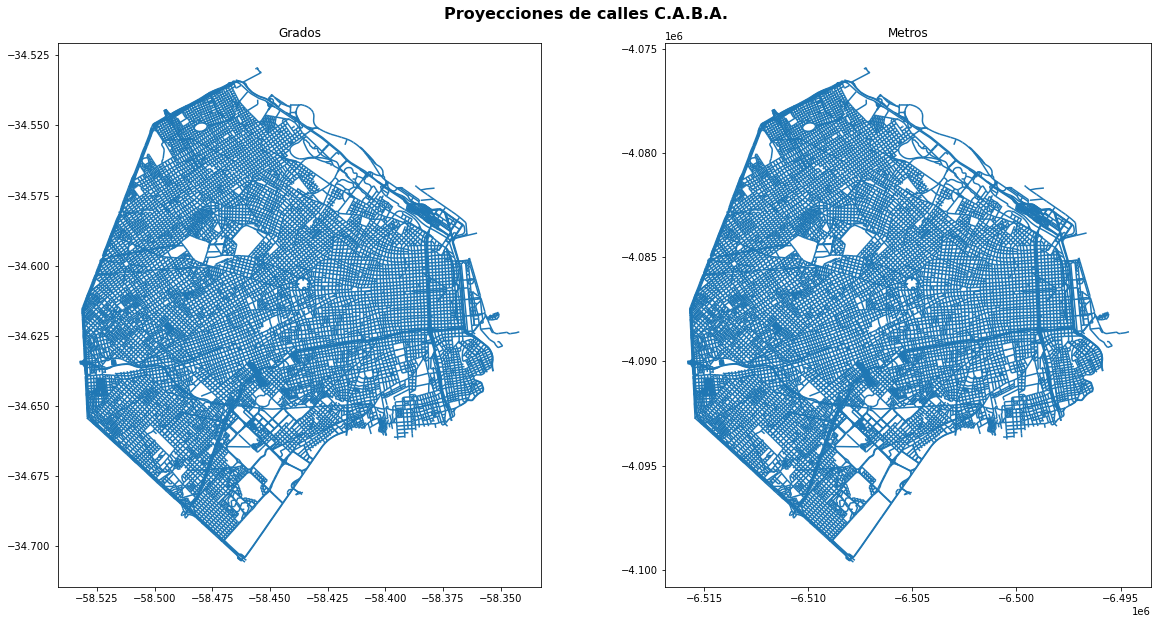

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

# Proyección en grados.
streetBA.plot(ax = ax1)
ax1.set_title("Grados")

# Proyección en metros
streetBA.to_crs("EPSG:3395").plot(ax = ax2)
ax2.set_title("Metros")

plt.suptitle("Proyecciones de calles C.A.B.A.",
             fontweight = 'bold' ,fontsize=16, y=0.93)
plt.show()

### Dirtribuidoras principales

Observemos como es la jerarquía de las calles. Para nuestro análisis queromos ver distancias a los principales accesos.

In [8]:
# Jerarquizadas
streetBA.red_jerarq.unique().tolist()

['VÍA DISTRIBUIDORA PRINCIPAL',
 'VÍA LOCAL',
 'VÍA DISTRIBUIDORA COMPLEMENTARIA',
 'VÍA TRONCAL']

In [9]:
# Filtramos por jerarquía de calle.
q = "red_jerarq == 'VÍA DISTRIBUIDORA PRINCIPAL' | red_jerarq =='VÍA TRONCAL'"
ppal = streetBA.query(q).to_crs("WGS84")

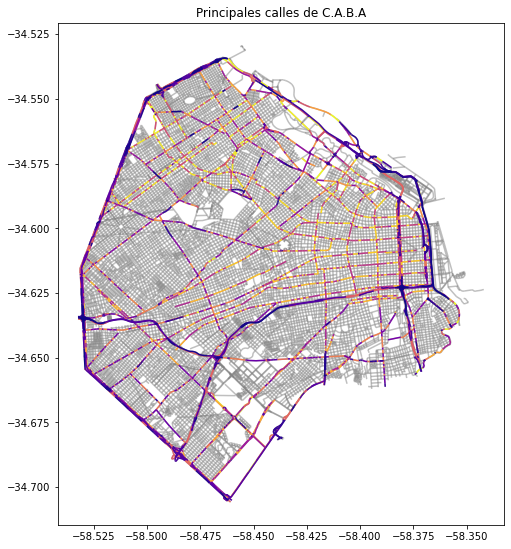

In [10]:
# Calles de fondo
axis = streetBA.plot(figsize=(8,10), color="grey", alpha= 0.5)
# Capa con calles principales
ppal.plot(ax = axis, cmap="plasma_r")

plt.title('Principales calles de C.A.B.A')
plt.show()

### Barrios y comunas
Veamos como están distribuidos los barrios y las comunas

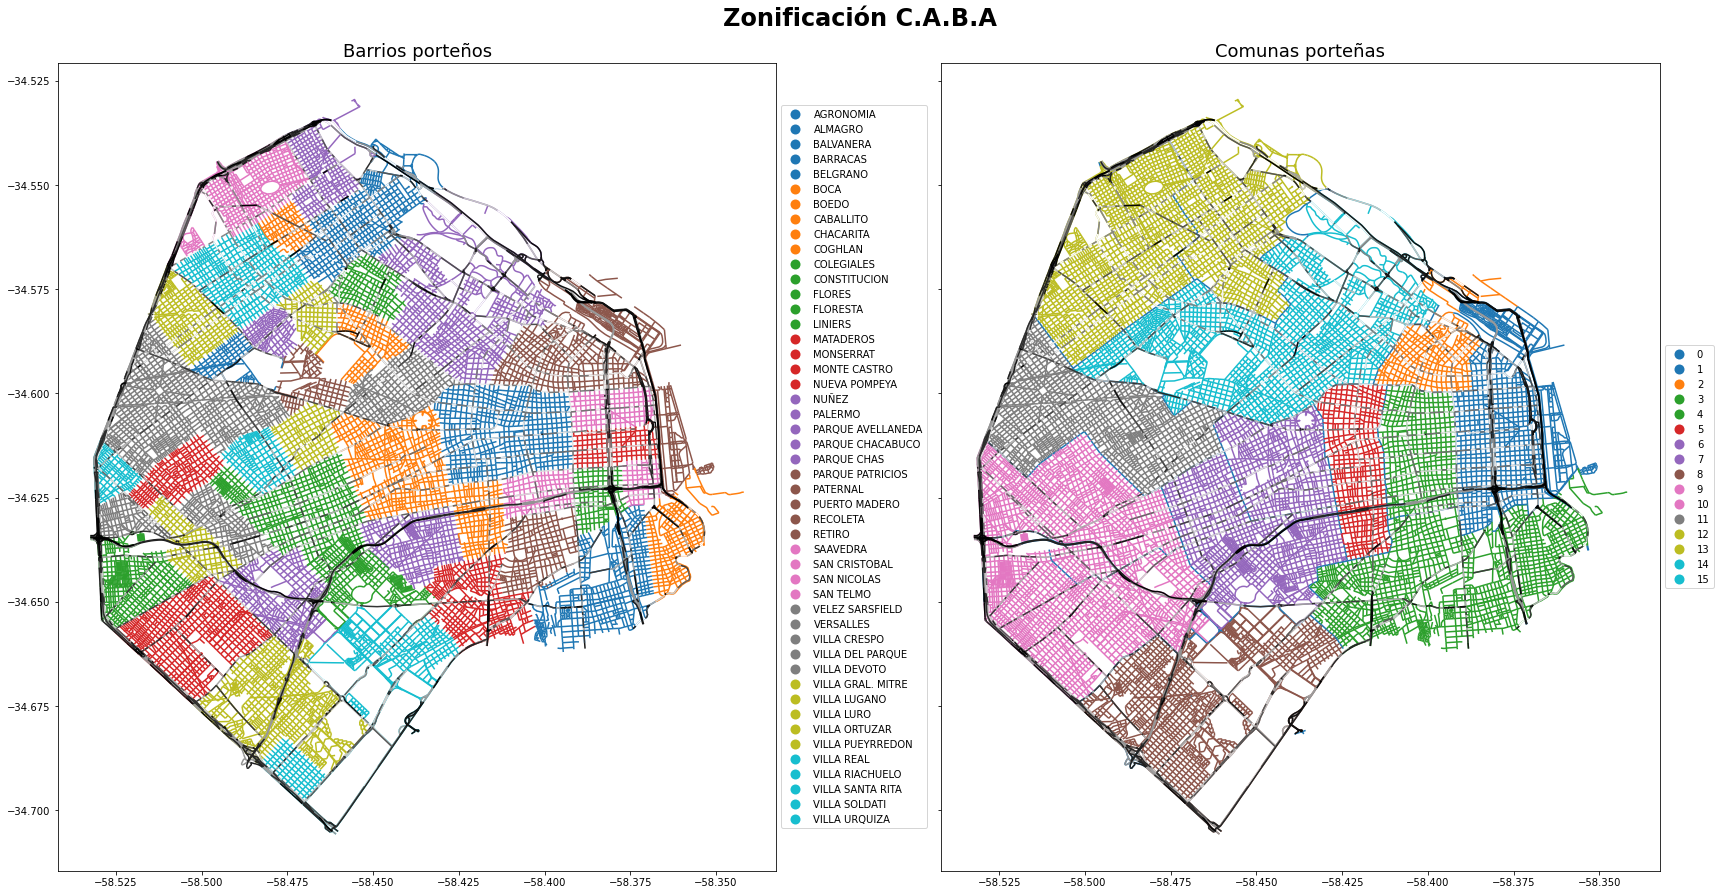

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,sharey=True, figsize=(24,15))

# Título
plt.suptitle("Zonificación C.A.B.A", fontsize = 24, fontweight = 'bold', y = 0.91)

# Subtítulos
ax1.set_title("Barrios porteños", fontsize = 18)
ax2.set_title("Comunas porteñas", fontsize = 18)

# Gráficos
streetBA.plot(column='BARRIO', categorical=True, legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"}, ax=ax1)
ppal.plot(ax = ax1, cmap="gist_yarg")

streetBA.plot(column='COMUNA', categorical=True, legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"}, ax=ax2)
ppal.plot(ax = ax2, cmap="gist_yarg")

fig.tight_layout()
plt.show()

### Analizamos un punto neurálgico. 

Desde un punto de referencia conocido observemos un radio definido para poder caracterizarlo.

Corrientes y 9 de Julio [(-34.6037664764394, -58.38212802882858)](https://www.google.com/maps/place/Av.+9+de+Julio+%26+Av.+Corrientes,+C1048+CABA/@-34.6038018,-58.384306,17z/data=!3m1!4b1!4m5!3m4!1s0x95bccacf425a4a19:0xaf19ab7297421a8!8m2!3d-34.6038018!4d-58.3821173), dato de latitud y logitud obtenido de googlemaps.

In [12]:
# Simulamos que los datos vienen en un Data Frame.
df = pd.DataFrame({'lugar': ['obelisco'], 'lat': [-34.6037664764394], 'lon':[-58.38152748491718]})

# Creamos la geometria (puntos) para latitud y longitud
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
# Creamos el geopandas
df = gpd.GeoDataFrame(df, geometry=geometry)
# Seteamos el sistema de coordenadas consistent
df.set_crs(crs = streetBA.crs, inplace = True)
df

lugar        lat        lon                     geometry
0  obelisco -34.603766 -58.381527  POINT (-58.38153 -34.60377)

In [13]:
# Seteamos el sistema de coordenadas a uno armonizado en metros.
df = df.to_crs("EPSG:3395")

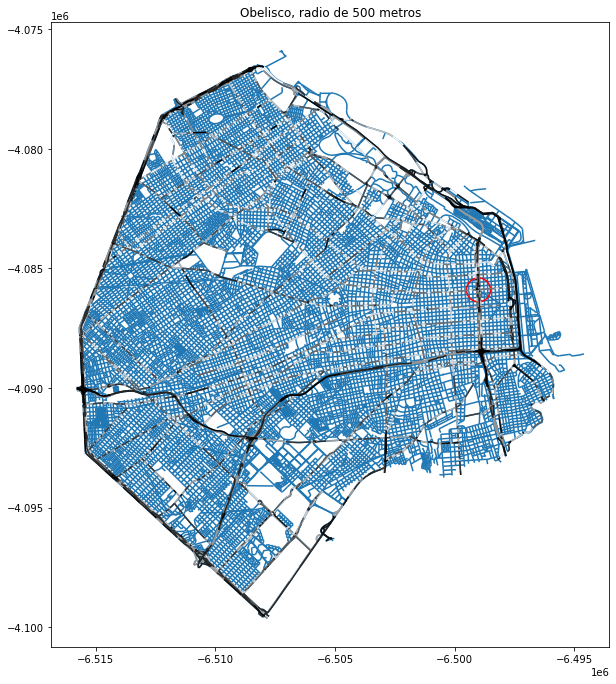

In [14]:
# Capa de calles CABA en metros.
axis = streetBA.to_crs("EPSG:3395").plot(figsize=(10,12))

# Capa de un perímetro de 500 m a la redonda.
df.buffer(500).boundary.plot(ax=axis, color='Red')
ppal.to_crs("EPSG:3395").plot(ax = axis, cmap="gist_yarg")

plt.title('Obelisco, radio de 500 metros')
plt.show()

## Delimitando areas de interes.
Vamos a registrar en una columna de nuestro df un registro para poder quedarnos con aquellas **_cosas_** que ocurran a un _radio_ conocido.

In [15]:
# Creamos la columna que delimitará la zona de cercanía.
radio = 600
df['radio'] = df.buffer(radio)

# Podemos cambiar la geometría principal de nuestros datos.
df.set_geometry('radio', inplace=True)

In [16]:
# Para operar entre geometrias debamos tener el mismo sistema de coord.
streetBA.to_crs("EPSG:3395", inplace=True)

In [17]:
# Vamos a registrar los sitios que interseptan el redio.
radio = gpd.overlay(streetBA, df, how='intersection')


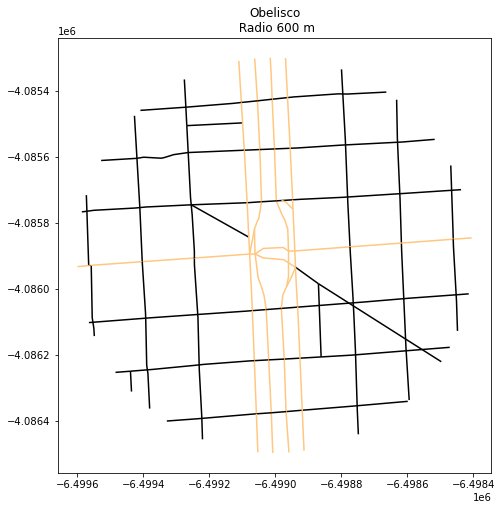

In [18]:
radio.plot('red_jerarq', figsize=(10,8), cmap="copper")
plt.title('Obelisco\n Radio 600 m')
plt.show()

Veamos que información de interes podemos obtener partiendo de un punto en el plano y un radio.

In [19]:

print(f'Hay {len(radio.nomoficial.unique())} calles en el radio', end='\n\n')
print(radio.nomoficial.unique(), end='\n\n')
print(f'De las cuales {len(radio.query(q).nomoficial.unique())} son vías principales', end='\n\n')
print(radio.query(q).nomoficial.unique())

Hay 21 calles en el radio

['SUIPACHA' 'VIAMONTE' 'CERRITO' 'LIBERTAD' 'TOSCANINI ARTURO' 'ESMERALDA'
 'TUCUMAN' 'LAVALLE' 'SAENZ PEÑA, ROQUE, PRES. DIAGONAL NORTE AV.' 'MAIPU'
 'PELLEGRINI, CARLOS' 'CORRIENTES AV.' 'TALCAHUANO' 'SARMIENTO'
 'CARABELAS' 'URUGUAY' 'PERON, JUAN DOMINGO, TTE. GENERAL'
 'MITRE, BARTOLOME' '9 DE JULIO AV.' 'URUGUAY AV.'
 'RIVAROLA, RODOLFO, Dr.']

De las cuales 4 son vías principales

['CERRITO' 'PELLEGRINI, CARLOS' 'CORRIENTES AV.' '9 DE JULIO AV.']


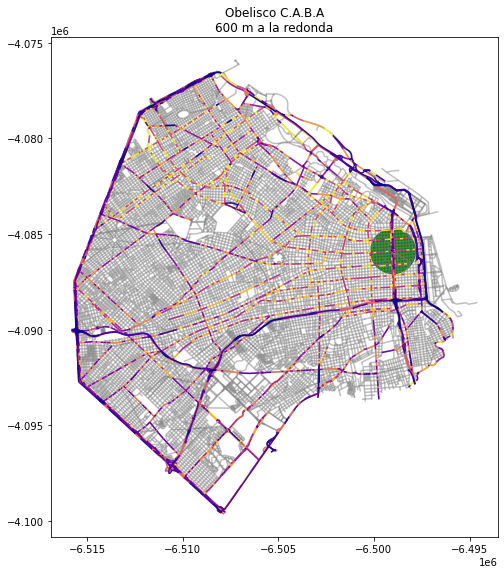

In [20]:
# Calles de fondo
axis = streetBA.to_crs("EPSG:3395").plot(figsize=(8,10), color="grey", alpha= 0.5)
df.buffer(600).plot(ax=axis, color="Green")
# Capa con calles principales
ppal.to_crs("EPSG:3395").plot(ax = axis, cmap="plasma_r")
plt.title('Obelisco C.A.B.A\n600 m a la redonda')
plt.show()


## Medios de transprote, subtes y colectivos.

Localización de estaciones de subte y paradas de colectivos

### Subte por lína
Partimos de los datos oficiales publicado por el gobierno de la ciudad de Buenos Aires.

In [21]:
url_subte = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/sbase/subte-estaciones/estaciones-de-subte.geojson'

subte = gpd.read_file(url_subte)
subte.to_crs(crs = streetBA.crs, inplace=True)

subte.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        90 non-null     float64 
 1   ESTACION  90 non-null     object  
 2   LINEA     90 non-null     object  
 3   geometry  90 non-null     geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 2.9+ KB


### Premetro

El premetro posee continuidad con las lineas de subte, vamos a jutar los datos con **subte**

In [22]:
premetro_path = '/home/jc/Descargas/estaciones-premetro.csv'

premetro = pd.read_csv(premetro_path)

# Creamos la geometria (puntos) para latitud y longitud
geometry = [Point(xy) for xy in zip(premetro.long, premetro.lat)]
# Creamos el geopandas
premetro = gpd.GeoDataFrame(premetro, geometry=geometry)
# Indicamos el sistema de coordenadas
premetro.set_crs(crs = 'EPSG:4326', inplace = True)
# Cambiamos el crs al que estamos usando
premetro.to_crs(streetBA.crs, inplace=True)

premetro.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   long      18 non-null     float64 
 1   lat       18 non-null     float64 
 2   id        18 non-null     int64   
 3   linea     18 non-null     object  
 4   nombre    18 non-null     object  
 5   geometry  18 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 992.0+ bytes


In [23]:
premetro.rename(columns={'id':'ID', 'nombre': 'ESTACION', 'linea':'LINEA'}, inplace=True)

subte = pd.concat([subte, premetro[['ID', 'ESTACION', 'LINEA', 'geometry']]])

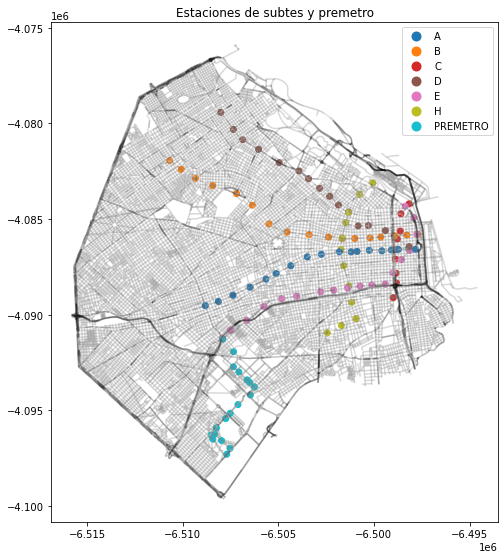

In [24]:
ax = streetBA.plot(color='Grey', alpha=0.3, figsize=(8,10))
ppal.to_crs("EPSG:3395").plot(ax = ax, cmap="gist_yarg", alpha = 0.3)
subte.plot('LINEA', ax = ax, legend=True)

plt.title('Estaciones de subtes y premetro')
plt.show()

### Paradas de colectivos

Ubicación de las paradas de colectivo a partir de los datos publicados por el gobierno de la ciudad de Buenos Aires.

In [25]:
paradas_url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/colectivos-paradas/paradas-de-colectivo.geojson'

bus = bus = gpd.read_file(paradas_url)
bus.set_crs(crs = 'EPSG:4326', inplace=True)
bus.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        6846 non-null   int64   
 1   CALLE     6846 non-null   object  
 2   ALT       6806 non-null   float64 
 3   coord_X   6846 non-null   float64 
 4   coord_Y   6846 non-null   float64 
 5   L1        6843 non-null   float64 
 6   l1_sen    6568 non-null   object  
 7   L2        3779 non-null   object  
 8   l2_sen    3538 non-null   object  
 9   L3        499 non-null    object  
 10  l3_sen    384 non-null    object  
 11  field_12  4 non-null      object  
 12  L4        68 non-null     object  
 13  l4_sen    40 non-null     object  
 14  L5        19 non-null     float64 
 15  l5_sen    7 non-null      object  
 16  L6        8 non-null      float64 
 17  l6_sen    3 non-null      object  
 18  field_19  0 non-null      float64 
 19  field_20  0 non-null      float64 
 20  

Observamos cuales son las lineas de colectivos que recorren la ciudad.

In [26]:
# Lienas de colecctivos
bus.L1.sort_values().unique()

array([  1.,   2.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  12.,  15.,
        17.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  28.,  29.,
        31.,  32.,  33.,  34.,  36.,  37.,  39.,  41.,  42.,  44.,  45.,
        46.,  47.,  49.,  50.,  51.,  52.,  53.,  55.,  56.,  57.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  67.,  68.,  70.,  71.,  74.,
        75.,  76.,  78.,  79.,  80.,  84.,  85.,  86.,  87.,  88.,  90.,
        91.,  92.,  93.,  95.,  96.,  97.,  98.,  99., 100., 101., 102.,
       103., 104., 105., 106., 107., 108., 109., 110., 111., 113., 114.,
       115., 117., 118., 119., 123., 124., 126., 127., 128., 129., 130.,
       132., 133., 134., 135., 136., 140., 143., 145., 146., 148., 150.,
       151., 152., 154., 158., 159., 160., 161., 163., 164., 166., 168.,
       169., 172., 175., 176., 177., 178., 179., 180., 181., 182., 184.,
       185., 188., 193., 194., 195.,  nan])

In [27]:
bus[bus.L1.isnull().values]

ID                          CALLE     ALT    coord_X    coord_Y  L1  \
196   6916                 ALMAFUERTE AV.   826.0 -58.415520 -34.647473 NaN   
2122  3502                 DIRECTORIO AV.  5111.0 -58.491962 -34.651553 NaN   
5267  8000  PRES. JULIO ROCA DIAGONAL SUR   782.0 -58.376926 -34.612300 NaN   

     l1_sen   L2 l2_sen   L3  ... l5_sen  L6 l6_sen field_19  field_20  \
196     NaN   31      V  NaN  ...    NaN NaN    NaN      NaN       NaN   
2122    NaN  NaN    NaN  NaN  ...    NaN NaN    NaN      NaN       NaN   
5267    NaN   22      V  NaN  ...    NaN NaN    NaN      NaN       NaN   

     field_21  field_22 field_23  field_24                     geometry  
196       NaN       NaN      NaN       NaN  POINT (-58.41552 -34.64747)  
2122      NaN       NaN      NaN       NaN  POINT (-58.49196 -34.65155)  
5267      NaN       NaN      NaN       NaN  POINT (-58.37693 -34.61230)  

[3 rows x 25 columns]

In [28]:
# Eliminavos valores nulos, y columnas innecesarias.
bus = bus[~bus.L1.isnull().values]
bus = bus[['L1' ,'CALLE', 'ALT', 'coord_X', 'coord_Y' ,'L1', 'geometry']].copy()

Hay datos de latitud y longitud que mal registrados. Poseen cambiado el signo.

In [29]:
# x Positivos
bus.loc[bus.geometry.x > 0, 'geometry'].x

448     58.359038
2866    58.473924
4600    58.478996
4601    58.479069
4969    58.491945
dtype: float64

In [30]:
# y positivos
bus.loc[bus.geometry.y > 0, 'geometry'].y

4601    34.56969
dtype: float64

Para corregir estos valores filtramos los datos, los multiplicamos por _-1_ y los reasiganmos nuevamente.

<div class="alert alert-block alert-danger">
    Comportamiento extraño. Un dato que posee (-x,-y) ambos datos posisionales alterados, podemos filtrarlo pero no se reasigna. (.loc = 4601)
</div>
    

<div class="alert alert-block alert-info 'GeoPandas, operación artmética'">

<b>Tip:</b> Al ejecutar dos veces (_for_) todos los datos quedan modificados correctamente.
</div>


In [31]:
# Corrección de registros mal asignados.
for _ in range(1):
    # Coordenada x > 0
    bus.loc[bus.geometry.x > 0, 'geometry'] = gpd.points_from_xy(
            x = bus.loc[bus.geometry.x > 0, 'geometry'].x * -1,
            y = bus.loc[bus.geometry.x > 0, 'geometry'].y,
            crs = bus.crs)
    # Coordenada y > 0
    bus.loc[bus.geometry.y > 0, 'geometry'] = gpd.points_from_xy(
            x = bus.loc[bus.geometry.y > 0, 'geometry'].x,
            y = bus.loc[bus.geometry.y > 0, 'geometry'].y * -1,
            crs = bus.crs)

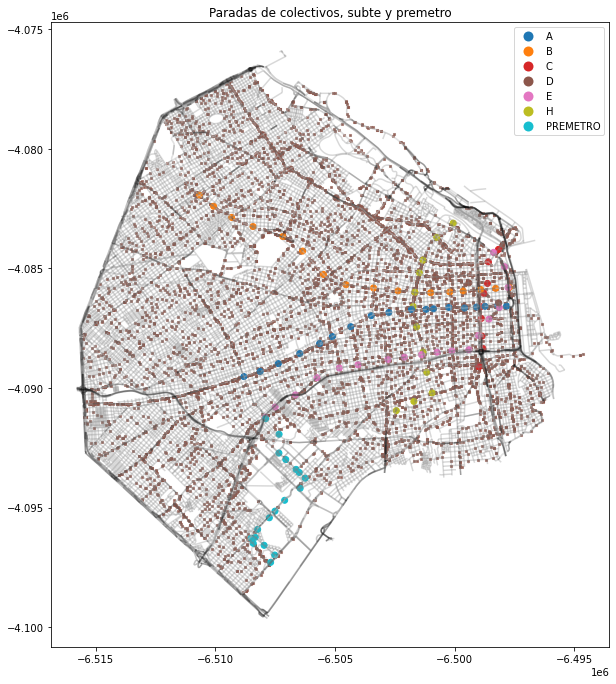

In [32]:
# Capa de calles.
ax = streetBA.plot(color='Grey', figsize = (10, 12), alpha = 0.3)
# Capa de paras de colectivos
bus.to_crs('EPSG:3395').plot(ax = ax, marker = 'X', alpha = 0.7,
                             markersize = 5, color = 'tab:brown')
# Capa de subtes.
subte.plot('LINEA', ax = ax, legend=True, label='subte')
# Capa vías principales.
ppal.to_crs("EPSG:3395").plot(ax = ax, cmap = "gist_yarg", alpha = 0.3)

plt.title('Paradas de colectivos, subte y premetro')
plt.show()

Vamos a buscar logares de interes para poder caracterizar las diferentes zonas.

## Espacios Verdes

Localización de los espacios verdes, plazas, parques y plazoletas.

In [33]:
park = gpd.read_file(r'/home/jc/Descargas/espacios-verdes-catastrales.zip!espacios verdes')

park.to_crs(crs = streetBA.crs, inplace=True)

park.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1394 non-null   int64   
 1   SECCION     1394 non-null   object  
 2   MANZANA     916 non-null    object  
 3   PARCELA     914 non-null    object  
 4   SMP         1394 non-null   object  
 5   TIPO_EV     1337 non-null   object  
 6   NOMBRE_EV   1377 non-null   object  
 7   UBICACION   1376 non-null   object  
 8   OBS         1327 non-null   object  
 9   BARRIO      1394 non-null   object  
 10  COMUNA      1394 non-null   object  
 11  SUPERFICIE  1394 non-null   float64 
 12  LEY         1303 non-null   object  
 13  FECHA_LEY   294 non-null    object  
 14  ORDENANZA   459 non-null    object  
 15  FECHA_ORD   484 non-null    object  
 16  DECRETO     386 non-null    object  
 17  FECHA_DEC   506 non-null    object  
 18  BOLETIN_OF  807 non-null    object  
 19

In [34]:
park[park.columns.to_list()[:-1]].sample(3).style

In [35]:
park = park[['TIPO_EV', 'NOMBRE_EV', 'UBICACION', 'BARRIO',
             'COMUNA', 'SUPERFICIE', 'NIVEL', 'geometry']].copy()

Observamos que categorías de parkes están registradas por el gobierno de C.A.B.A.

In [36]:
park.TIPO_EV.unique()

array(['PLAZA', 'PLAZOLETA', 'JARDÍN', 'PARQUE', 'JARDÍN BOTÁNICO',
       'PASEO', 'CANTERO CENTRAL', 'CANTEROS CENTRALES', nan, 'ROTONDA',
       'DELLEPIANE', 'AU. TTE. GRAL. LUIS DELLEPIANE',
       'PATIO RECREATIVO Nº12', 'PATIO PORTEÑO', 'PATIO RECREATIVO',
       'CANTERO', 'GENERAL PAZ', 'CANTEROS', 'JARDINES', 'BOSQUE',
       'AU PREDIDENTE HÉCTOR J- CÁMPORA', 'PLAZOLETAS',
       'RESERVA ECOLÓGICA', 'ESPACIO PÚBLICO', 'PATIO DE JUEGOS',
       'AU PTE. HÉCTOR J. CÁMPORA', 'JARDÍN ZOOLÓGICO',
       'PARQUE DEPORTIVO', 'AU TTE. GRAL. DELLEPIANE', 'ESPACIO VERDE'],
      dtype=object)

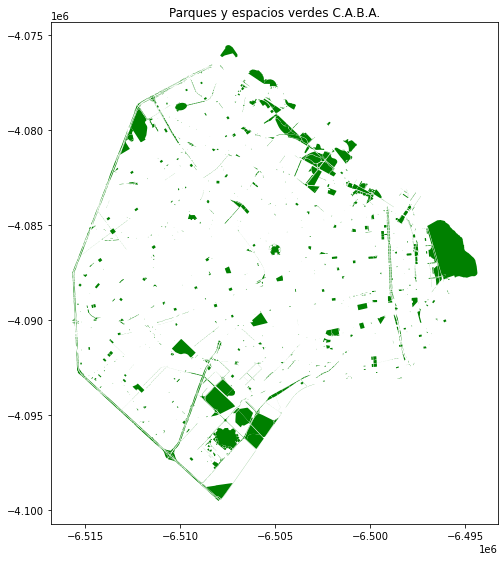

In [37]:
park.plot(color = 'Green', figsize = (8,10))
plt.title('Parques y espacios verdes C.A.B.A.')
plt.show()

En el gráfico anterior queda reflejada la necesidad de espacios abiertos.

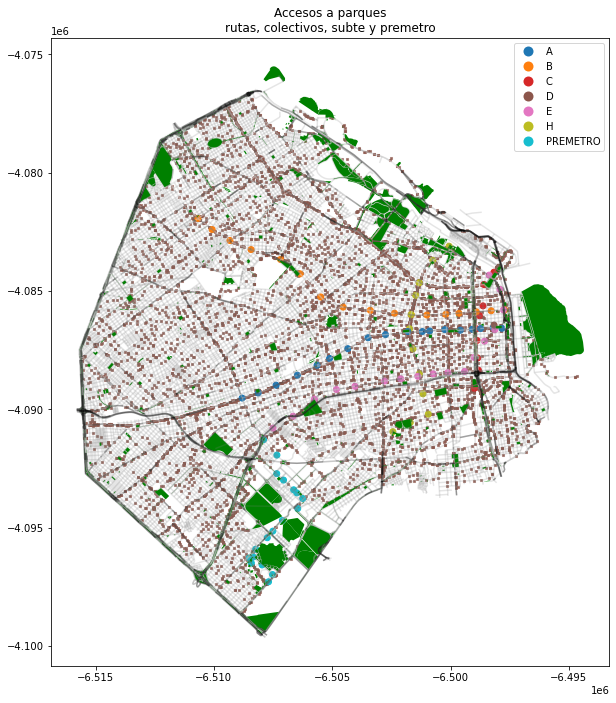

In [38]:
# Capa de calles.
ax = streetBA.plot(color='Grey', figsize = (10, 12), alpha = 0.2)
# Capa de paras de colectivos
bus.to_crs('EPSG:3395').plot(ax = ax, marker = 'X', alpha = 0.7,
                             markersize = 5, color = 'tab:brown',
                            legend = True, label = 'Bus')
# Capa de subtes.
subte.plot('LINEA', ax = ax, legend = True, label ='subte')
# Capa vías principales.
ppal.to_crs("EPSG:3395").plot(ax = ax, cmap = "gist_yarg", alpha = 0.4)

park.plot(ax = ax, color = 'Green')

plt.title('Accesos a parques\nrutas, colectivos, subte y premetro')
plt.show()

Para inspeccionar mayor profundidad se pueden ver los [Recorridos de colectivos incluida la zona del AMBA](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/colectivos-recorridos/recorrido-colectivos.geojson), o el [mapeo de árboles de C.A.B.A.](https://data.buenosaires.gob.ar/dataset/arbolado-espacios-verdes).

## Ubicación de las escuelas porteñas

Utilizamos los datos abiertos y provistos por el gobierno de ciudad para ubicar las escuelas tanto de gestión pública como privada. Este dato puede ser relevante para quienes estén en etapa educativa.

In [39]:
esc_url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/establecimientos-educativos/establecimientos_educativos_WGS84.geojson'
esc = gpd.read_file(esc_url)

esc.to_crs(crs = streetBA.crs, inplace=True)

esc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cui         2973 non-null   int64   
 1   cueanexo    2973 non-null   int64   
 2   cue         2973 non-null   int64   
 3   anexo       2973 non-null   int64   
 4   sector      2973 non-null   float64 
 5   dom_edific  2973 non-null   object  
 6   dom_establ  2973 non-null   object  
 7   nombre_est  2973 non-null   object  
 8   nombre_abr  2973 non-null   object  
 9   telefono    2971 non-null   object  
 10  email       2958 non-null   object  
 11  codpost     2973 non-null   object  
 12  web_megcba  2954 non-null   object  
 13  nivmod      2973 non-null   object  
 14  nivelmodal  2972 non-null   object  
 15  tipest_abr  2939 non-null   object  
 16  tipest      2973 non-null   object  
 17  depfun      2939 non-null   object  
 18  depfun_otr  2973 non-null   object  
 19

In [40]:
esc.head(3)

cui  cueanexo     cue  anexo  sector                         dom_edific  \
0  202298  20012301  200123      1     2.0                       Malabia 2370   
1  200093  20302719  203027     19     1.0  Dr. Tomás Manuel de Anchorena 855   
2  200094  20037300  200373      0     1.0                    Jean Jaurés 870   

                          dom_establ  \
0                       Malabia 2370   
1  Dr. Tomás Manuel de Anchorena 855   
2                    Jean Jaurés 870   

                                          nombre_est           nombre_abr  \
0                               Colegio de los Niños  Col de los Niños a1   
1  ESEA en Danza Mastrazzi Curso Vocacional de Da...        CV Dan Inf 08   
2         Centro Educativo de Nivel Secundario N° 16              CENS 16   

    telefono  ...               depfun_otr   de comuna     barrio  \
0        S/d  ...  Ministerio de Educación  9.0   14.0    PALERMO   
1        S/D  ...  Ministerio de Educación  2.0    3.0  BALVANERA   
2  4961-3657  ...  Ministerio de Educación  2.0    3.0  BALVANERA   

              area_progr estado        point_x        point_y  \
0    04 - HOSP FERNANDEZ      1  104067.008445  104865.057575   
1  08 - HOSP RAMOS MEJIA      1  105051.174297  103376.523112   
2  08 - HOSP RAMOS MEJIA      1  105107.166197  103214.524412   

                                               nivel  \
0  Inicial Común - Primario Común - Secundario Común   
1   Otros Servicios Educativos de la modalidad Común   
2                    Secundario de Jóvenes y Adultos   

                            geometry  
0  POINT (-6503170.116 -4083427.177)  
1  POINT (-6501975.002 -4085232.834)  
2  POINT (-6501906.945 -4085429.390)  

[3 rows x 28 columns]

In [41]:
# Restringimos la información a algunas columnas de interes.
esc = esc[['nombre_est', 'sector','depfun_otr', 'de', 'comuna', 'barrio',
           'estado', 'point_x', 'point_y', 'nivel', 'geometry']].copy()

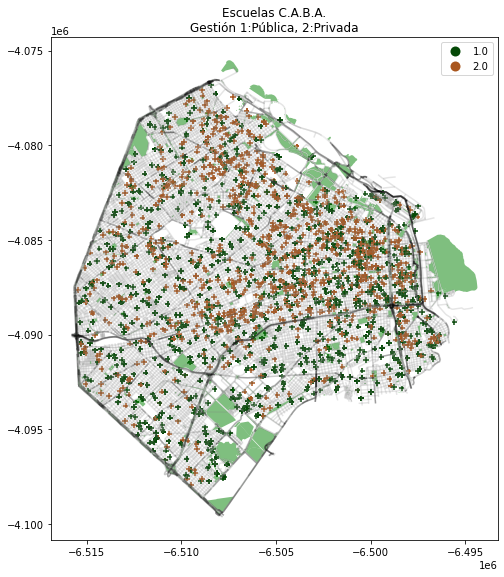

In [42]:
colors = ['xkcd:darkgreen', 'xkcd:sienna'] # 'salmon', 'grey', 
cmap = ListedColormap(colors)

# Capa calles
ax = streetBA.plot(figsize = (8,10), color = "grey", alpha = 0.2)
# Capa Escuelas
esc.plot(column = 'sector', ax = ax, marker = '+', cmap = cmap,
         vmin=0, vmax=len(colors) ,s = 30, categorical = True, legend = True)
# Capa vías principales.
ppal.to_crs("EPSG:3395").plot(ax = ax, cmap = "gist_yarg", alpha = 0.35)
# Capa parques
park.plot(ax = ax, color = 'Green', alpha=0.5)
                                                                  
plt.title('Escuelas C.A.B.A.\nGestión 1:Pública, 2:Privada')
plt.show()

In [43]:
# streetBA.shift?
# streetBA.boundary?
# geo.to_crs?
# line.project?

In [44]:
## Datos de entrada
#Line =  [(-58.39323087479187, -34.64522852285068), (-58.39493519860744, -34.64593911202303), (-58.39540370387294, -34.64612018963881), (-58.39577715270643, -34.64624297063709), (-58.3961720086682, -34.64636735300267), (-58.39657393244798, -34.64649079664271), (-58.39686900560828, -34.64658786576401), (-58.39768408267521, -34.64688376919202), (-58.39804117638568, -34.64699057960223), (-58.39811749931905, -34.64700849164973), (-58.39828903137601, -34.64704378391358), (-58.39848415993365, -34.64708122410398), (-58.3986547387477, -34.64709449060737), (-58.3988514934597, -34.64709955836587), (-58.39897325079004, -34.6471023653607), (-58.39913887311855, -34.64708744614302), (-58.40078230339798, -34.64694668280777), (-58.4011366548087, -34.64692373544752), (-58.40140137506319, -34.64690660901691), (-58.40169294994597, -34.64689298223946), (-58.40188791399491, -34.64691373562576), (-58.40216794959328, -34.64695369573664), (-58.41441599275006, -34.64898345419851), (-58.41468645364731, -34.64902341675737), (-58.41491789917437, -34.6490522244158), (-58.41504783372419, -34.64906712767555), (-58.41517069354625, -34.64908171429391), (-58.41533660567228, -34.64909137548982), (-58.41610344894117, -34.64910924442286), (-58.41663883920926, -34.64911070715178), (-58.41691994816962, -34.64910623905278), (-58.41712925394172, -34.64908282123896), (-58.41735140092969, -34.64905175937751), (-58.4175040105956, -34.64901464682342), (-58.41778163827102, -34.64893890857992), (-58.41810776345819, -34.64882463807892), (-58.42014859446244, -34.64801074189261), (-58.42109129459963, -34.64768468167974), (-58.42150738131538, -34.64755870865789), (-58.42342555778116, -34.64704856595483), (-58.42380036444368, -34.64696522849173), (-58.42402399498763, -34.64692538456899), (-58.42422994553617, -34.64689682578112), (-58.42442882836995, -34.64688048716456), (-58.42466544132492, -34.64686749516407), (-58.42492895224804, -34.64686969903472), (-58.42519118859626, -34.64689581060387), (-58.42548633816839, -34.64693076251233), (-58.42574834123136, -34.64696690278817), (-58.42600734692162, -34.64703299983701), (-58.42633487929256, -34.64713342399471), (-58.42672363380665, -34.6472903832091), (-58.42701863504796, -34.64744017525714), (-58.42735477118806, -34.64764714102999), (-58.42758954729708, -34.64780944247776), (-58.42780426987807, -34.64798874926387), (-58.42805931284784, -34.64825160891823), (-58.42826384085686, -34.64851328718624), (-58.42836837245316, -34.64865441916345), (-58.42849097552769, -34.64886100909527), (-58.42863862000018, -34.64921981114054), (-58.43039902344795, -34.65411150588781), (-58.43058099211167, -34.65454759092934), (-58.43074440690579, -34.65487960245804), (-58.43091147516467, -34.65519055733962), (-58.43112803380347, -34.65554914847827), (-58.43260609566938, -34.65801519415205), (-58.43278567440816, -34.65827265019357), (-58.43296016110701, -34.65845540315134), (-58.43315011877778, -34.65865061801186), (-58.43335842356506, -34.65885169235345), (-58.43349821535271, -34.65894935913921), (-58.43369231539262, -34.65907745659961), (-58.43391244522258, -34.65921105679707), (-58.4342196854351, -34.65939138210857), (-58.43446159367213, -34.65950262175289), (-58.4354319679709, -34.65989668701516), (-58.44002778106239, -34.66183363815986), (-58.44218397209216, -34.66275027310008), (-58.46163757545956, -34.67090968101208), (-58.46246050330255, -34.67120817614321), (-58.46280547898094, -34.67132107658005), (-58.46307488578911, -34.67139608443851), (-58.46332241010779, -34.67144991252323), (-58.46353300409209, -34.67149541798045), (-58.46859653017688, -34.67249959570204), (-58.46908781436287, -34.67259411624501), (-58.46938034898276, -34.67267684368898), (-58.46981999535013, -34.67282189408634), (-58.47017709131737, -34.67296547046871), (-58.47422872212128, -34.67473003403723), (-58.47458907678709, -34.67490463353656), (-58.47485536868304, -34.67507001487545), (-58.47511721636123, -34.67527809815956), (-58.47561611823835, -34.67573966172805), (-58.47637678148585, -34.67650147966764), (-58.4772898411353, -34.677473083393), (-58.47756878106423, -34.67779366716631), (-58.47927838887487, -34.68008637250686), (-58.4796189824651, -34.68046368453628), (-58.4797836819284, -34.68061589623475), (-58.47997298162954, -34.68077149644261), (-58.48013854950542, -34.68087214089938), (-58.48033951807771, -34.68099482470753), (-58.48077178430249, -34.68117907983302), (-58.4809809942354, -34.68125468946911), (-58.48151812211091, -34.68141121492266), (-58.49074865351113, -34.68364996209967), (-58.49280644305118, -34.68416717487745), (-58.49323181266317, -34.68430677581161), (-58.4939040130434, -34.68450404480966), (-58.494446444632, -34.68469758388901), (-58.50679022633284, -34.68987115611775), (-58.50863040256832, -34.6906581855909), (-58.51021336002367, -34.69130911057548), (-58.51092048468821, -34.69162906732615), (-58.51128148474532, -34.69180116103016), (-58.51164513166684, -34.69197626961216), (-58.51190552938787, -34.6921423269721), (-58.51223224913973, -34.6923465503359), (-58.51266317587315, -34.69263696928233), (-58.51283797439013, -34.69275574911642), (-58.51343928772994, -34.69323891435921), (-58.51613617076313, -34.69565149779803), (-58.51639524277449, -34.6959621229764), (-58.51657880735801, -34.69623621532357), (-58.51668736518741, -34.69648714304233), (-58.51677990482248, -34.69677220564932), (-58.51681912473175, -34.69694815217243), (-58.51683540541565, -34.69728978685934), (-58.51682586767205, -34.69757721116119), (-58.51679226699013, -34.697818097686), (-58.51670205772855, -34.69812198637412), (-58.51657448656194, -34.69837726193614), (-58.51643210417134, -34.69861385564264), (-58.51621815101113, -34.69887195886386), (-58.5160233966457, -34.69905049204797), (-58.51546229204164, -34.69948099921363), (-58.51164101129704, -34.70237114559549)]
#Punto = (-58.45,-34.68)
#
## Computar la proyección del punto sobre la línea
#line = LineString(Line)
#p = Point(Punto)
#np = line.interpolate(line.project(p))
#
## Función para pintar una serie de puntos en el color que se le pase como parámetro
#def plot_coords(ax, ob, color='#999999'):
#    x, y = ob.xy
#    ax.plot(x, y, 'o', color=color, zorder=1)
#
## Función para pintar una línea (irá superpuesta a los puntos)
#def plot_line(ax, ob, color='#6699cc'):
#    x, y = ob.xy
#    ax.plot(x, y, color=color, alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
#
## Creación de la figura con matplotlib
#fig = plt.figure(1, figsize=(6,6), dpi=90)
#ax = fig.add_subplot(111)
#
## Pintar la línea y los puntos que la componen
#plot_line(ax, line)
#plot_coords(ax, line)
#
## Pintar en rojo el punto externo y en verde su proyección
#plot_coords(ax, p, "red")
#plot_coords(ax, np, "green")
#ax.set_aspect(1)

# Datos Inmobiliarios

## Abstract

Intentaremos describir si existe una correlación entre precios, variaciones de constos de la construcción (CAC) y movilidad de la moneda. Esperamos utilizar como descriptor la venta de inmuebles correlacionado con la devaluación de la moneda local. También suele observarse que los precios son _normalizados_ por m² y/o por zona. Nos preguntamos cuan representativas son estas métricas (promedio de precio/m² por zona) y si efectivamente estas medias son diferentes para diversas zonas y más profundamente si estos promedios son adecuados para informar el precio general de una zona.
Finalmente intentaremos profucir algún modelo que "ajuste" del _mejor_ modo posible para ver:

* Precios de propiedades por tipo y zona.
* Identificar velocidad de publicación (vp) asumiendo que una vp alta refleja una transacción "de alta demanda"
* Identificar si las descripiones y título de la publicación corelaciona con vp.


Analizaremos el mercado inmobiliario de Ciudad Autónoma de Buenos Arires (C.A.B.A) y conurbano bonaerense (AMBA) de Argentina. Para ello utilizaremos Datos provistos por <a href='https://www.properati.com.ar'>Properati</a> conteniendo publicaciones de transacciones inmobiliarias.


<u>**Fuentes**</u>:

+ Transacciones inmobiliarias: [properati](https://www.properati.com.ar/data/)
+ Evolución del dólar: [Banco de la Nacion Argentina](https://www.bna.com.ar/Personas)
+ Evolución del dolar informal: [Ambito financiero](https://www.ambito.com/contenidos/dolar-informal-historico.html)
+ Indices cer, uva, uvi: [Datos.gob](https://datos.gob.ar/dataset/sspm-cer-uva-uvi/archivo/sspm_94.2)
+ Indice cac: [Camara Argentina de la cosntrucción](https://www.cifrasonline.com.ar/indice-cac/)

Palabras claves: Mercado inmobiliario Argentina (zona AMBA), Peso, Dolar. CAC, UVA, UVI, CER.

## API GoogleCloud

Utilizaremos la api de google, [Google Cloud](https://cloud.google.com/apis?utm_source=google&utm_medium=cpc&utm_campaign=latam-AR-all-es-dr-SKWS-all-all-trial-p-dr-1605194-LUAC0015731&utm_content=text-ad-none-any-DEV_c-CRE_534644671851-ADGP_Hybrid%20%7C%20SKWS%20-%20PHR%20%7C%20Txt%20~%20API-Management_General-KWID_43700065166765693-kwd-307450581253&utm_term=KW_cloud%20api-ST_cloud%20API&gclid=CjwKCAiAuaKfBhBtEiwAht6H7xZCCKYlbdT-vBoDR_dojCj_wQbMJTbQukWmzEXf7u5KGcI8uxB2xxoCE1gQAvD_BwE&gclsrc=aw.ds&hl=es) para traernos los datos publicados por properati.

In [45]:
# !conda install -c conda-forge pandas-gbq google-cloud-bigquery

In [46]:
# Conección con datos
from google.cloud import bigquery

Luego de creado un usuario y proyecto en la plataforma de Google Cloud podremos conectanos como clientes y realizar consultas con [BigQuery (Ver doc.)](https://cloud.google.com/python/docs/reference/bigquery/latest), API de google que nos facilita traernos grandes cantidades de datos de la nube o trabajar en ella.

Para esto debemos indicar en el entorno donde guardamos las [credenciales](https://cloud.google.com/docs/authentication/application-default-credentials?hl=es-419) provistas por la API e indentificarnos con nuestra id del proyecto creado en la nube.

In [47]:
# Set env: entorno donde está la key para autenticar el usuario de google.
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/jc/Escritorio/YO_K/datascience-376903-d0240f836683.json"

# Set cli: proyecto creado en la nube.
client = bigquery.Client(project = 'datascience-376903')

In [48]:
# Consulta de prueba.
sql = """
SELECT *
FROM `bigquery-public-data.properati_properties_ar.properties_sell_201802`
LIMIT 3
"""

df = client.query(sql).to_dataframe()
print(f'Este es un objeto: \n{type(df)}', end='\n')
df

Este es un objeto: 
<class 'pandas.core.frame.DataFrame'>


id  created_on operation  \
0  1d758e15e1bda28b9b623b51856169e5bb432645  2017-12-21      sell   
1  7fe3886ae623d87cd0935e97a065b17b6b0f2cf8  2017-12-22      sell   
2  c17a66fd47e087c1f092bddb5ff502784bc12d87  2018-01-09      sell   

  property_type place_name place_with_parent_names country_name state_name  \
0     apartment      Salta       |Argentina|Salta|    Argentina      Salta   
1         house      Salta       |Argentina|Salta|    Argentina      Salta   
2         house      Salta       |Argentina|Salta|    Argentina      Salta   

   geonames_id                    lat_lon  ...  surface_covered_in_m2  \
0      3838231      -24.733385,-65.494736  ...                   <NA>   
1      3838231      -24.797868,-65.406922  ...                    240   
2      3838231  -24.78212738,-65.42319489  ...                    270   

   price_usd_per_m2  price_per_m2 floor  rooms  expenses  \
0               NaN           NaN  <NA>   <NA>      <NA>   
1               NaN           NaN  <NA>      5      <NA>   
2               NaN           NaN     2      5      <NA>   

                                       properati_url  \
0  https://www.properati.com.ar/1j69h_venta_depar...   
1  https://www.properati.com.ar/1j7lm_venta_casa_...   
2  https://www.properati.com.ar/1jg8u_venta_casa_...   

                                         description  \
0  Diseño moderno pero que a su vez conserva deta...   
1  Corredor Responsable: Pablo Castañeda - C.U.C....   
2  Zona muy residencial del Tipal. Terreno de 3.8...   

                                         title  \
0                        Palmas de San Lorenzo   
1     Casa en Venta en San Luis. Salta-Capital   
2  Los Teros     100 - U$D 650 - Casa en Venta   

                                     image_thumbnail  
0  https://thumbs4.properati.com/8/U3fjlCv7ZSmW0J...  
1  https://thumbs4.properati.com/8/aMeIRfgJh3426R...  
2  https://thumbs4.properati.com/3/weYd-0rRw1k2A7...  

[3 rows x 27 columns]

In [49]:
sql = """
SELECT
  created_on, place_name,
  operation, property_type,
  lat_lon, expenses,
  price, currency,
  floor, rooms,
  surface_total_in_m2,
  surface_covered_in_m2,
  description
FROM `datascience-376903.argentina_real_estate_listings.*`
WHERE
  REGEXP_CONTAINS(_TABLE_SUFFIX, 'properties_(rent|sell)_201[5-9][01-12]')
  AND place_name LIKE '%apita%'
  AND property_type IN('apartment', 'house', 'PH')
  AND price IS NOT NULL
  AND currency IN('ARS', 'USD')
"""

In [50]:
df = client.query(sql).to_dataframe()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13433 entries, 0 to 13432
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_on             13433 non-null  dbdate 
 1   place_name             13433 non-null  object 
 2   operation              13433 non-null  object 
 3   property_type          13433 non-null  object 
 4   lat_lon                13433 non-null  object 
 5   expenses               880 non-null    Int64  
 6   price                  13433 non-null  float64
 7   currency               13433 non-null  object 
 8   floor                  1581 non-null   Int64  
 9   rooms                  3951 non-null   Int64  
 10  surface_total_in_m2    10006 non-null  Int64  
 11  surface_covered_in_m2  12558 non-null  Int64  
 12  description            13433 non-null  object 
dtypes: Int64(5), dbdate(1), float64(1), object(6)
memory usage: 1.4+ MB


In [52]:
# Intevalo de tiempo de los datos
Md = df.created_on.min()
md = df.created_on.max()
print(f'Datos desde el {md} hasta el {Md}')

Datos desde el 2018-01-31 hasta el 2014-07-01


Veamos la calidad de los datos. Para nuestro análisis es clave contar con descripctores de las propiedades.
Vemos que los datos subidos a Google Cloud **no tienen incluidos valores del tipo**:
+ Cantidad de baños
+ Cantidad de cuartos
Aunque posee:
+ Cantidad de habientes
+ Pisos (solo aplicaría a una categoría)
+ Valor de expensas (si este valor es correcto será __muy útil__)


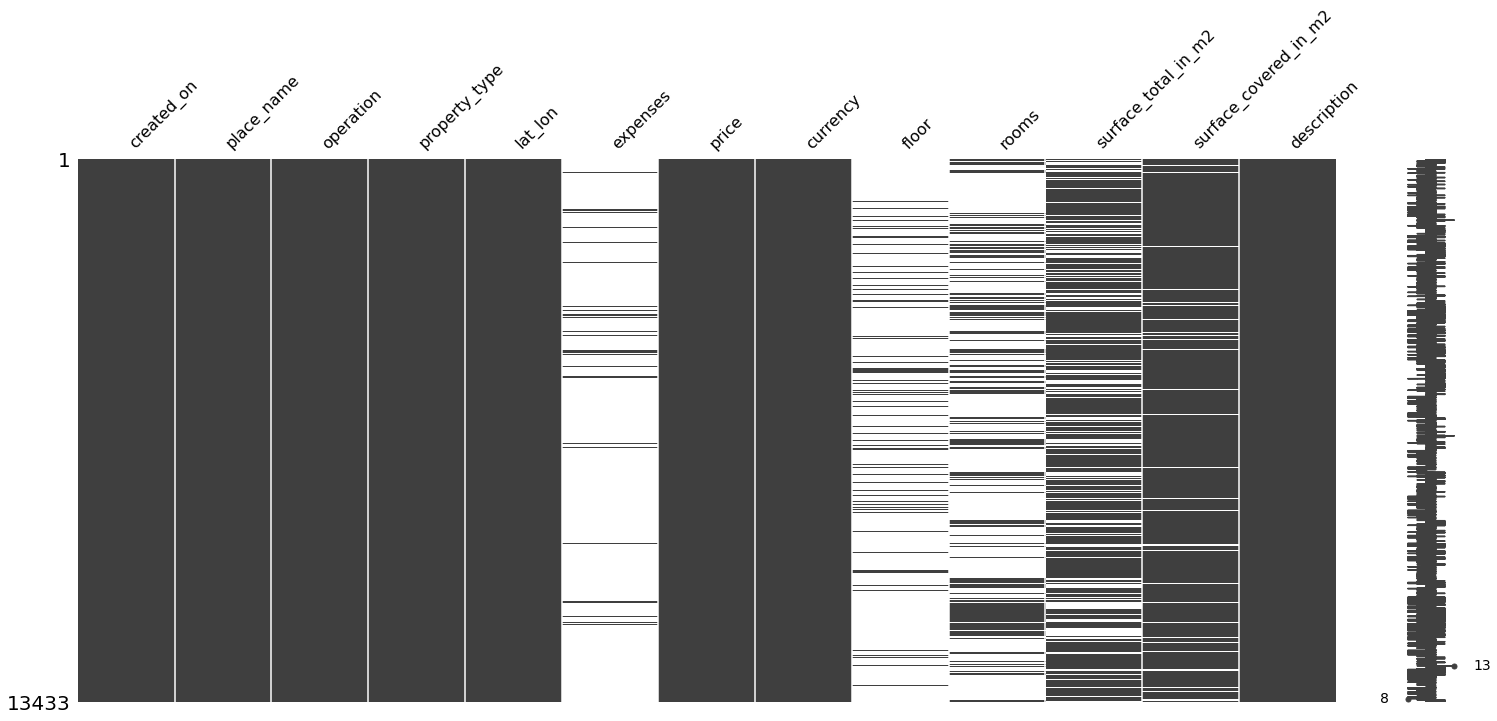

In [53]:
# Visualización de faltantes
msno.matrix(df)
plt.show()

Observamos que la _cantidad/calidad_ de los datos es mala. Las características que buscamos no solo no se encuentran, sino que las mínimas (habientes) están mayormente vacias. Podríamos imputar estos datos a partir de la _descripción_.


Veamos si podemos sacar algunos datos de la descripción

In [54]:
df[df.description.str.contains('.*sin expensa.*', regex=True)].description.to_list()[:3]

['Excepcional propiedad "al frente", "sin expensas", ni exigencia de Garantía propietaria. Excelente vista panorámica libre frente a la avenida, desde un quinto (5to) piso. Balcón aterrazado de 10 m2 (8,60m x 1,15m). Notable aireación y luminosidad. Ubicación zonal con posibilidades amplias de transporte y cercanías a subtes y avenidas Boedo y Jujuy, 200 m. de Autopista 25 de Mayo y centros comerciales. El valor para ingresar es de 3 1/2 meses + el valor de la póliza de la empresa aseguradora (1 1/2 mes), financiable. Pisos de parquet en habitaciones principales. Calefacción central sin costo. Puede configurarse como: un 4 ambientes con dependencia de servicio, o como: un 5 ambientes con 3 baños. ',
 'Excepcional propiedad "al frente", "sin expensas", ni exigencia de Garantía propietaria. Excelente vista panorámica libre frente a la avenida, desde un quinto (5to) piso. Balcón aterrazado de 10 m2 (8,60m x 1,15m). Notable aireación y luminosidad. Ubicación zonal con posibilidades amplias

In [55]:
# Cuantos valores "sin expensas" podemos salvar.
df.loc[df.description.str.contains('.*sin expensa.*', regex=True), 'expenses'].isnull().sum().sum()

75

De los 13.400 solo 75 dicen sin expensas. Esto hace penzar que la descripicón no es lo suficientemente buena.

Corrijamos estos valores y busquemos los valores con expensas.

In [56]:
# Asignamos valor 0
df.loc[df.description.str.contains('.*sin expensa.*', regex=True), 'expenses'] = 0

In [57]:
# Registros con la palabra expensas
df.loc[df.description.str.contains('.*expensa.*',regex=True), 'expenses'].notnull()

11        True
12       False
24       False
37        True
48        True
         ...  
13383     True
13388     True
13396    False
13400     True
13404     True
Name: expenses, Length: 612, dtype: bool

In [58]:
df.loc[df.description.str.contains('.*expensa.*',regex=True), 'expenses'].notnull().sum()

183

In [59]:
df.description.str.extract(r'.*(expensa).*(\$\s+\d+)')[1].notnull().sum()

46

Vemos que el dato de mayor relevancia que nos traemos (*expenses*) será dificil de imputar incluso utilizando expresciones regulares. 

De 13400 datos:
* 880  son numéricos (hay que analizar si todos sirven).
* 183  poseen la palabra expesnas en la descripción de la publicación.
* 46   rápidamente se puede acceder al valor numérico que lo acompaña.


## Datos Properati

La fuente de datos de Properati ofrece dos alternativas para obtener datos que han liberado.

* Conectarse vía API GoogleCloud prometiendo descargar gran cantidad de información.
* Descarga de un archivo .zip

Vemos si con un esfuerzo menor conseguimos mejores datos.

Utilizaremos datos preprosesados ([link](https://colab.research.google.com/drive/1xwkWA4KL2b4BTnDwXC6_V-94nG4JRR4k?usp=share_link)), obtenidos de <a href='https://www.properati.com.ar'>Properati</a>.
Esto resume la query realizada previemente. A estos datos les hemos agregado valores de los indicadores detallados al inicio:

* Cotización Dolar
* Cotización CAC
* Cotización CER
* Cotización UVA
* Cotización UVI

Estos valores son extraidos de fuentes oficiales y agregados a nuestra tabla respetando la fecha de cotización con la fecha de publicación del inmueble. Para mayor detalle consultar el siguiente [notebook](https://colab.research.google.com/drive/1xwkWA4KL2b4BTnDwXC6_V-94nG4JRR4k?usp=share_link)


#### Descripción del dataset completo.

fuente [properati](https://www.properati.com.ar/data/)

---



* **type**: Tipo de aviso (Propiedad, Desarrollo/Proyecto).

* **country**: País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)

* **id**: Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.

* **start_date**: Fecha de alta del aviso.

* **end_date**: Fecha de baja del aviso.

* **created_on**: Fecha de alta de la primera versión del aviso.

* **place**: Campos referidos a la ubicación de la propiedad o del desarrollo.

* **lat**: Latitud.

* **lon**: Longitud.

* **l1** Nivel administrativo 1: país.

* **l2**: Nivel administrativo 2: usualmente provincia.

* **l3**: Nivel administrativo 3: usualmente ciudad.

* **l4**: Nivel administrativo 4: usualmente barrio.

* **property** Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

* **operation**: Tipo de operación (Venta, Alquiler).

* **type**: Tipo de propiedad (Casa, Departamento, PH).

* **rooms**: Cantidad de ambientes (útil en Argentina).

* **bedrooms**: Cantidad de dormitorios (útil en el resto de los países).

* **bathrooms**: Cantidad de baños.

* **surface_total**: Superficie total en m².

* **surface_covered**: Superficie cubierta en m².

* **price**: Precio publicado en el anuncio.

* **currency**: Moneda del precio publicado.

* **price_period**: Periodo del precio (Diario, Semanal, Mensual)

* **title**: Título del anuncio.

* **description**: Descripción del anuncio.

* **development**: Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).

* **status**: Estado del desarrollo (Terminado, En construcción, ...)

* **name**: Nombre del desarrollo.

* **short_description**: Descripción corta del anuncio.

* **description**: Descripción del anuncio.

In [87]:
data = pd.read_csv('./Data/properties_clean.csv.zip')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513942 entries, 0 to 513941
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  513942 non-null  int64  
 1   id                          513942 non-null  object 
 2   start_date                  513942 non-null  object 
 3   end_date                    513942 non-null  object 
 4   lat                         460394 non-null  float64
 5   lon                         460359 non-null  float64
 6   l1                          513942 non-null  object 
 7   l2                          513942 non-null  object 
 8   l3                          508510 non-null  object 
 9   l4                          195096 non-null  object 
 10  rooms                       390537 non-null  float64
 11  bedrooms                    357357 non-null  float64
 12  bathrooms                   428447 non-null  float64
 13  surface_total 

Limpiamos los datos para registrar solo los de interes para nuestro análisis.

In [88]:
# Vamos a analizar valores de departamentos.
propiedad = 'Departamento'
region = 'Capital Federal'
operacion = 'Alquiler'

filtro = (data.property_type == propiedad)\
        & (data.l2==region)\
        & (data.operation_type==operacion)

datos = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
         'price', 'price_USD', 'lat', 'lon', 'currency', 'l3',]

df = data[filtro][datos].copy()
df.rename(columns={'l3':'neighborhood'}, inplace = True)

df.sample(10).style

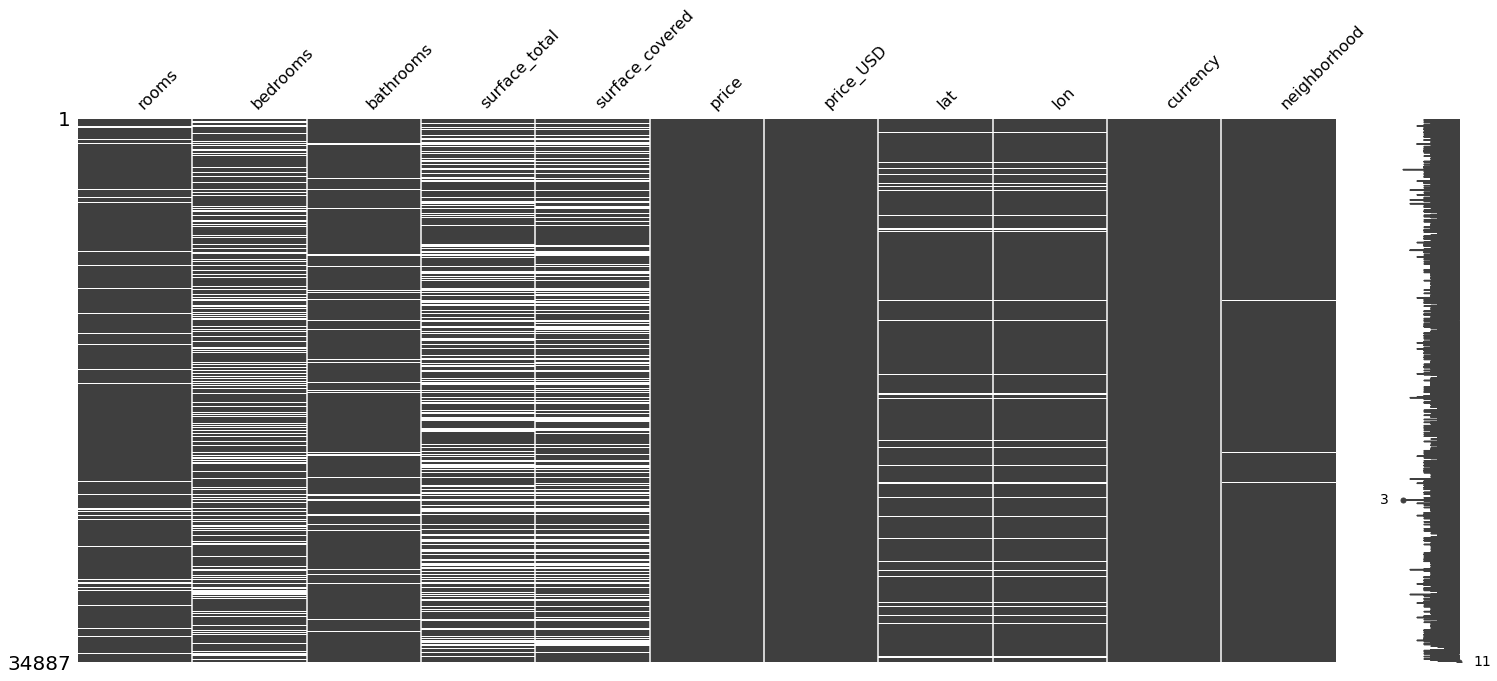

In [62]:
# Visualización de faltantes
msno.matrix(df)
plt.show()

## Modelo y procesamiento d edatos

Buscaremos completar, imputar los datos faltantes. Para ello debemos importar algunas librerias.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Imputación de valores

In [64]:
# Imputamos los datos numéricos faltantes utilizando todas las columnas.
impKNN = KNNImputer(n_neighbors=5)

# Las columnas categóricas son eliminadas.
dto2 = impKNN.fit_transform(df.drop(columns=['currency', 'neighborhood'].copy()))

# Guardamos los datos en un dataframe de pandas
dto2 = pd.DataFrame(dto2, columns=impKNN.feature_names_in_,
                    index=df.index.tolist().copy()
                    )

In [65]:
# Redondeamos los features que deben ser enteros.
col = ['rooms', 'bedrooms', 'bathrooms']
dto2[col] = np.around(dto2[col].values)

In [66]:
# Valores únicos de 'rooms', 'bedrooms', 'bathrooms'
set(np.reshape(dto2[['rooms', 'bedrooms', 'bathrooms']].values, (-1,)))

{0.0, 1.0, 2.0, 3.0, 4.0}

Con los datos de latitud y longitud imputados podemos buscar completar los valores de l3 (Barrio). 

Seguimos dos estrategias:

1. Buscamos si ya hay resitros de l3 que coincidan con los nuevos valores de lat lon.
2. Imputamos los datos utilizando SimpleImputer(strategy="most_frequent") de sklearn.impute.


In [67]:
# Registramos los valores mín, máx de lat y lon para cada barrio
# zone['Barrio'] = {lat:(min, max), lon:(min, max)}
zone = {
    z: {'lat': (df[df.neighborhood==z].lat.min(), df[df.neighborhood==z].lat.max()),
        'lon': (df[df.neighborhood==z].lon.min(), df[df.neighborhood==z].lon.max())
        } for z in df.neighborhood.unique()
}

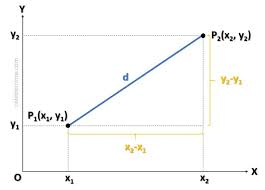

In [68]:
# Para encontrar la menor distancia calculada.
def dist(lat, lon, latMiss, lonMiss):
    """
    Devuelve la distancia carteciana.
    param:
    -----
    lat: tuple
        (min, máx) valor de latitud de referencia.
    lon: tuple
        (min, máx) valor de longitud de referencia.
    latMiss, lonMiss: float
        punto al cuál calcular la distancia.
    ------
    return: int
        distancia carteciana
    """
    segMlat, segMlon = (lat[1] - lat[0])/2, (lon[1] - lon[0])/2
    
    return np.sqrt((latMiss-segMlat)**2 + (lonMiss-segMlon)**2)

In [69]:
idx_lalo = {}

# iteramos sobre los idx donde falta el valor de neighborhood
for idxna in df.index[df.neighborhood.isnull()]:
    dist_min = 100_000
    barrio = np.nan
    # Necesitamos encontrar el "Mejor bario" que aplique a los valores imputados
    latImp, lonImp = dto2.iloc[dto2.index.get_loc(idxna)][['lat', 'lon']]
    for z in zone.items():
        if z[1]['lat'][0] <= latImp <= z[1]['lat'][1]:
            if z[1]['lon'][0] <= lonImp <= z[1]['lon'][1]:
                d = dist(z[1]['lat'], z[1]['lon'], latImp, lonImp)
                if d < dist_min:
                    dist_min = d
                    barrio = z[0]
    idx_lalo[idxna] = barrio#(barrio, dist_min)

print(f'hay {len(idx_lalo)} barrios perdidos')

hay 159 barrios perdidos


In [70]:
# Reemplazo los valores faltantes por los calculados
df.loc[df.neighborhood.isnull(), ['neighborhood']] = df[df.neighborhood.isnull()].index.map(idx_lalo).values

In [71]:
print(f'hay {len(df.loc[df.neighborhood.isnull()])} registros que no se pueden deducir del dataframe')

hay 9 registros que no se pueden deducir del dataframe


Imputamos utilizando [SimpleImputer](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation)

In [72]:
# Incorporamos la columna faltante currency
dto2.insert(9, 'currency',  df.currency.copy(deep=True))

imp_SI = SimpleImputer(strategy="most_frequent")
dto2[['neighborhood']] = imp_SI.fit_transform(df[['neighborhood']])


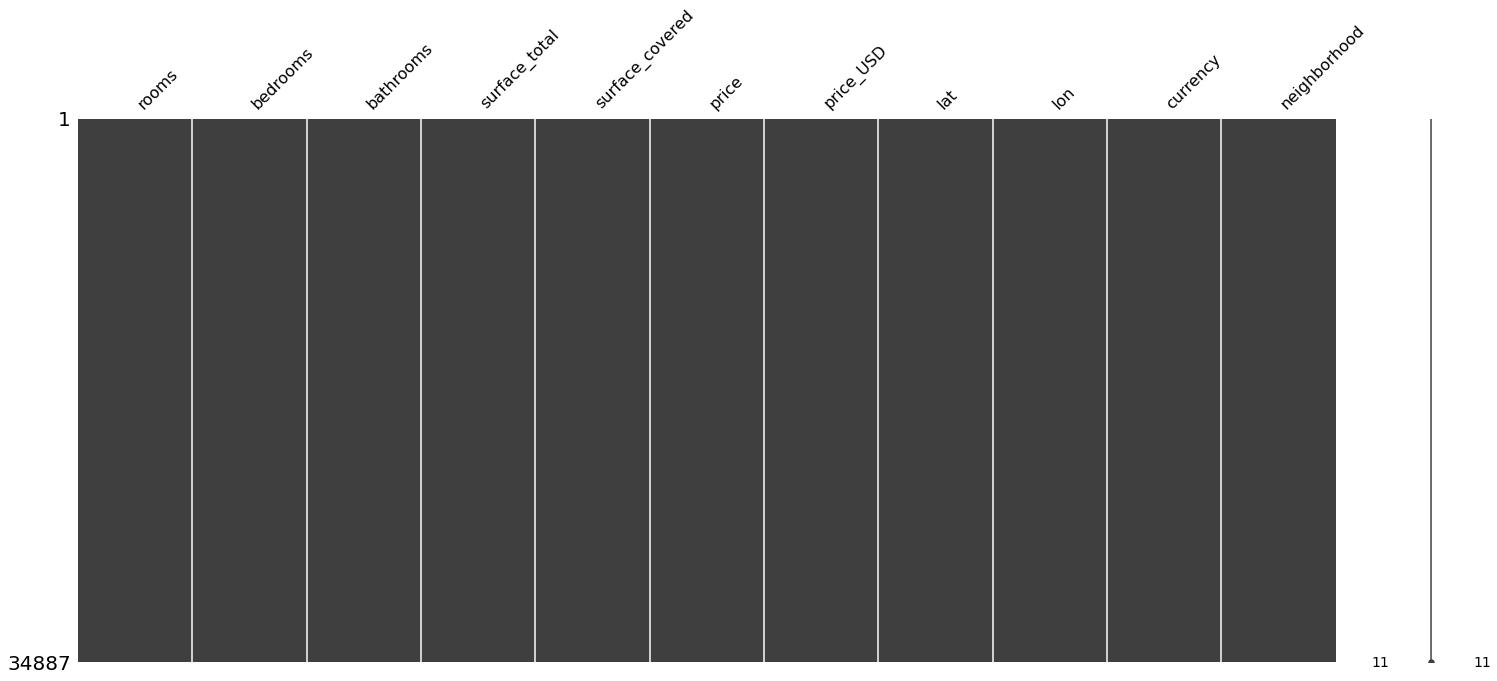

In [74]:
# Si volvemos a ver los datos obsevamos que no tenemos datos incompletos.
msno.matrix(dto2)
plt.show()

In [75]:
# sklearn.preprocessing.OneHotEncoder
ohe = OneHotEncoder()
dto_cat_ohe = ohe.fit_transform(dto2[['currency','neighborhood']])

Para las variables categóricas hacemos un One Hot Encoder para convertirlas en numéricas.

In [76]:
dto2_ohe = pd.DataFrame(
    dto_cat_ohe.toarray(), 
    columns=ohe.get_feature_names_out(),
    index=dto2.index.tolist().copy()
)

In [77]:
# Juntamos los datos del OHE
dto2 = dto2.join(dto2_ohe)

dto2.columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'price_USD', 'lat', 'lon', 'currency', 'neighborhood',
       'currency_ARS', 'currency_USD', 'neighborhood_Abasto',
       'neighborhood_Agronomía', 'neighborhood_Almagro',
       'neighborhood_Balvanera', 'neighborhood_Barracas',
       'neighborhood_Barrio Norte', 'neighborhood_Belgrano',
       'neighborhood_Boca', 'neighborhood_Boedo', 'neighborhood_Caballito',
       'neighborhood_Catalinas', 'neighborhood_Centro / Microcentro',
       'neighborhood_Chacarita', 'neighborhood_Coghlan',
       'neighborhood_Colegiales', 'neighborhood_Congreso',
       'neighborhood_Constitución', 'neighborhood_Flores',
       'neighborhood_Floresta', 'neighborhood_Las Cañitas',
       'neighborhood_Liniers', 'neighborhood_Mataderos',
       'neighborhood_Monserrat', 'neighborhood_Monte Castro',
       'neighborhood_Nuñez', 'neighborhood_Once', 'neighborhood_Palermo',
       'neighborhood_Parque Avellaneda',

Escalamos los datos para que la regresión no esté sesgada por la escala de cada feature.

In [79]:
dto2.drop(columns=['currency', 'neighborhood'], inplace=True)

# (X - media) / std
scalerSS = StandardScaler()
dto2_scaledSS = scalerSS.fit_transform(dto2)

# (X - rango_intercuartílico) / std
scalerRS = RobustScaler()
dto2_scaledRS = scalerRS.fit_transform(dto2)

Con los datos completos y escalados ya podemos implementar una regresión para predecir precios y calcular el r² para evaluar la "bondad" del predictor.

Para esto primero debo separa los datos en train y test.

Recordamos los datos iniciales

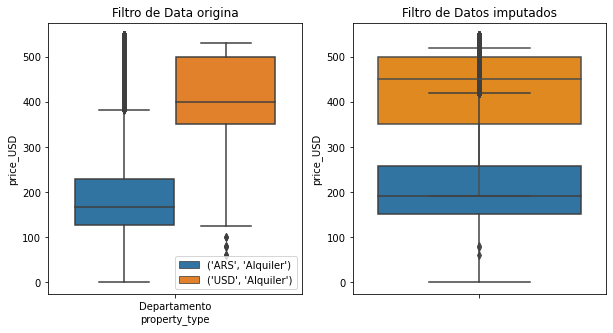

In [116]:
fig, ax = plt.subplots(1,2, sharey = False)

# Filtro de Data original
f = (data.property_type=='Departamento')&(data.operation_type=='Alquiler')
sns.boxplot(x="property_type", y="price_USD", data=data[f], ax=ax[0],
            hue=data[f][['currency', 'operation_type']].apply(tuple, axis=1))
ax[0].set_title('Filtro de Data origina')

# Valores imputados
sns.boxplot(y="price_USD", data=dto2[dto2.currency_USD==1], ax = ax[1], color = 'DarkOrange')
sns.boxplot(y="price_USD", data=dto2[dto2.currency_USD==0], ax = ax[1])
ax[1].set_title('Filtro de Datos imputados')


plt.show()

En la gráfica de arribapodemos comprobar que los datos no se alteraron por manipularlos con la imputación de valores.

Y los valores normalizados.

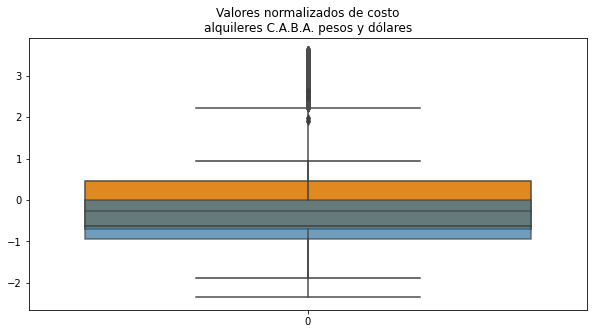

In [118]:
# Por la media
usd, ars = np.unique(dto2_scaledSS[:,12])
# Publicaciones en dólares
sns.boxplot(data=np.where(dto2_scaledSS[:,12] == usd, dto2_scaledSS[:,6], np.nan), color='DarkOrange')
# Publicaciones en pesos
sns.boxplot(data=np.where(dto2_scaledSS[:,12] == ars, dto2_scaledSS[:,6], np.nan), boxprops=dict(alpha=0.7))

plt.title('Valores normalizados de costo\nalquileres C.A.B.A. pesos y dólares')
plt.show()

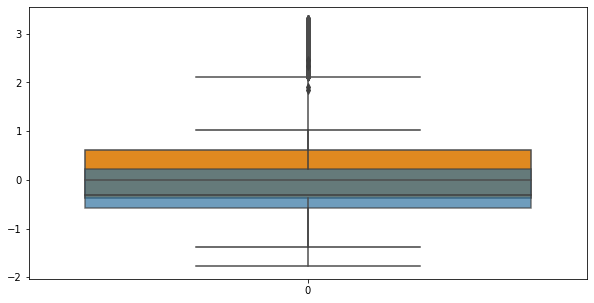

In [120]:
# Siguiendo los cuartilos
usd, ars = np.unique(dto2_scaledRS[:,12])
# Publicaciones en dólares
sns.boxplot(data=np.where(dto2_scaledRS[:,12] == usd, dto2_scaledRS[:,6], np.nan), color='DarkOrange')
# Publicaciones en pesos
sns.boxplot(data=np.where(dto2_scaledRS[:,12] == ars, dto2_scaledRS[:,6], np.nan), boxprops=dict(alpha=0.7))
plt.show()

Esta última metodología es menos sensible a valores extremos.

In [121]:
dto2_scaledRS = pd.DataFrame(dto2_scaledRS, columns=dto2.columns)

X = dto2_scaledRS.drop(columns=['price', 'price_USD'])
y = dto2_scaledRS['price_USD']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [123]:
# Creamos el modelo y ajustamos el modelo con X_train y y_train
lr = LinearRegression().fit(X_train,y_train)

# PRedecir con X_test
y_pred = lr.predict(X_test)

In [124]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("R²:",r2)

MAE: 0.4022198511750528
MSE: 0.3085532210872308
R²: 0.5898371333921955
